Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [1]:
import numpy as np
a = np.random.random((10,3))
print(a)
print("RESULT: ", a[np.arange(10), np.argmin(abs(a - 0.5), axis = 1)])

[[0.17746383 0.44633506 0.40606241]
 [0.2901908  0.03171634 0.1283682 ]
 [0.9449221  0.74457127 0.33026259]
 [0.59917559 0.43600788 0.70467295]
 [0.1883529  0.88577383 0.07822391]
 [0.39190582 0.97510628 0.84502147]
 [0.8706444  0.94900249 0.42917286]
 [0.35039555 0.91284421 0.85626485]
 [0.18087998 0.56384744 0.74601369]
 [0.07826232 0.27911048 0.62438812]]
RESULT:  [0.44633506 0.2901908  0.33026259 0.43600788 0.1883529  0.39190582
 0.42917286 0.35039555 0.56384744 0.62438812]


Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.


In [2]:
a = np.random.random((6, 6))
print(a)
print("RESULT: ", np.sum(a, axis = 1) / np.min(a, axis = 0))

[[0.56548665 0.58720124 0.65520252 0.10459372 0.38164539 0.51057156]
 [0.20546409 0.75989773 0.2048208  0.29334041 0.31499629 0.00722326]
 [0.79131852 0.43793522 0.16948829 0.36322956 0.7145024  0.72746138]
 [0.9188108  0.71386236 0.78399149 0.19831566 0.68800652 0.33521585]
 [0.65787306 0.83942951 0.33665796 0.38610548 0.61636797 0.6437596 ]
 [0.82639067 0.29653723 0.48358965 0.65230121 0.51232674 0.83203263]]
RESULT:  [ 13.65056589   6.02198448  18.90357985  34.78413994  11.0483637
 498.82981559]


На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [3]:
x = np.array([6,2,0,3,0,0,5,7,0])
print(x)
print("RESULT: ", np.max(np.array([x[i] for i in np.arange(1, len(x)) if (x[i - 1] == 0)])))

[6 2 0 3 0 0 5 7 0]
RESULT:  5


Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [4]:
x = np.ones(10)
i = np.array([0,1,2,3,5,5,5,8])
x[i]+=np.bincount(i)[i]
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(obs, number_of_clusters, iter_max=20, dif_dis=1e-05):
    dis = 1
    iter=0
    new_dis = 0
    old_dis = 0

    data = obs[:,0] + obs[:,1]*1j

    centroids = np.array([[data[-5*i] for i in range(0,number_of_clusters)]]) #initial centroids
    new_centroids = centroids

    while ((dis > dif_dis) and (iter<iter_max)):  
         iter+=1      
         centroids = new_centroids
         clusters = np.argmin(abs(data - centroids.T), axis = 0)

         new_centroids.fill(0)
         
         for i in range(0,clusters.size):
             new_centroids[0][clusters[i]]+=data[i]

         new_centroids[0] /= np.hstack((np.bincount(clusters), np.ones(number_of_clusters - np.bincount(clusters).size)))

         new_dis = np.sum(abs(data - centroids.T[clusters].ravel()))
         dis = abs(old_dis - new_dis)
         old_dis = new_dis


    result = np.ones((number_of_clusters, 2))
    result[:,0] = new_centroids.real
    result[:,1] = new_centroids.imag
    
    return (result, new_dis/number_of_clusters)

С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.


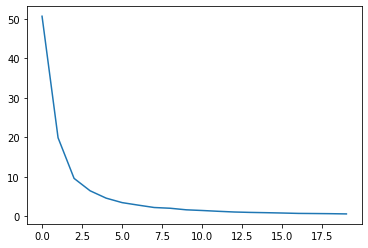

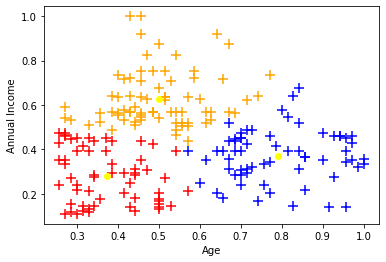

In [6]:
import matplotlib.pyplot as plt
import scipy.cluster

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
age_income = data[:, [2,3]]
age_income = age_income.astype(float)
age_income[:,0] = age_income[:,0] / np.max(age_income[:,0])
age_income[:,1] = age_income[:,1] / np.max(age_income[:,1])


dis = np.empty(20)
for number in range(0,dis.size):
    a, b = kmeans(age_income, number+1)
    dis[number] = b

plt.plot(np.arange(dis.size), dis)
plt.show()

number = 3
a = kmeans(age_income, number)

z = np.array([a[0][:,0] + a[0][:,1]*1j])
clusters = np.argmin(abs(age_income[:,0] + age_income[:,1]*1j - z.T), axis = 0)

colors = ['red', 'orange', 'blue', 'green', 'black', 'grey']

for k in np.arange(number):
    if (k < np.bincount(clusters).size):
        groups = np.empty((np.bincount(clusters)[k],2))
        j=0
        for i in np.arange(clusters.size):
            if clusters[i] == k:
                groups[j,:] = age_income[i,:]
                j = j+1
        plt.scatter(groups[:,0],groups[:,1], color = colors[k], marker = '+', s = 100, linewidths = 0.1)

plt.scatter(a[0][:,0], a[0][:,1], color = 'yellow')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

Клиентов можно условно поделить на три группы: молодые люди с небольшим заработком, пожилые со средним и люди со большим доходом (преимущественно среднего и молодого возраста)


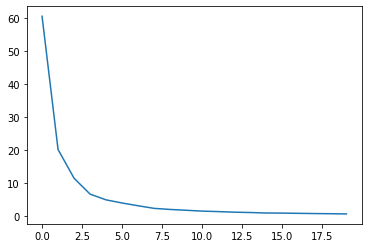

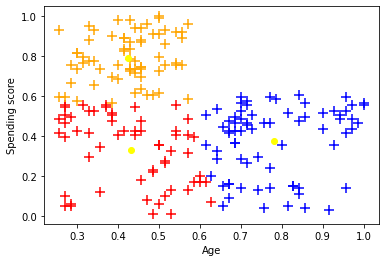

In [7]:
age_score = data[:, [2,4]]
age_score = age_score.astype(float)
age_score[:,0] = age_score[:,0] / np.max(age_score[:,0])
age_score[:,1] = age_score[:,1] / np.max(age_score[:,1])


dis = np.empty(20)
for number in range(1,dis.size+1):
    a, b = kmeans(age_score, number)
    dis[number-1] = b

plt.plot(np.arange(dis.size), dis)
plt.show()

number = 3
a = kmeans(age_score, number)

z = np.array([a[0][:,0] + a[0][:,1]*1j])

clusters = np.argmin(abs(age_score[:,0] + age_score[:,1]*1j - z.T), axis = 0)

colors = ['red', 'orange', 'blue', 'green', 'black', 'grey']

for k in np.arange(number):
    if (k < np.bincount(clusters).size):
        groups = np.empty((np.bincount(clusters)[k],2))
        j=0
        for i in np.arange(clusters.size):
            if clusters[i] == k:
                groups[j,:] = age_score[i,:]
                j = j + 1
        plt.scatter(groups[:,0],groups[:,1], color = colors[k], marker = '+', s = 100, linewidths = 0.1)

plt.scatter(a[0][:,0], a[0][:,1], color = 'yellow')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.show()

Три группы: пожилые люди с небольшим количеством покупок, и молодые - активные и неактивные покупатели. Причем активных покупателей старших возрастов почти нет


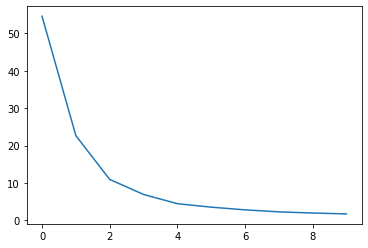

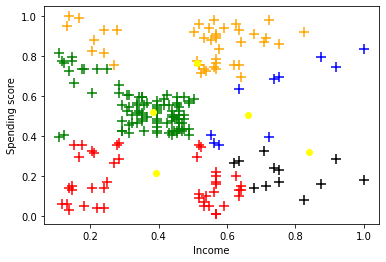

In [8]:
income_score = data[:, [3,4]]
income_score = income_score.astype(float)
income_score[:,0] = income_score[:,0] / np.max(income_score[:,0])
income_score[:,1] = income_score[:,1] / np.max(income_score[:,1])

dis = np.empty(10)
for number in range(1,dis.size+1):
    a, b = kmeans(income_score, number)
    dis[number-1] = b

plt.plot(np.arange(dis.size), dis)
plt.show()

number = 5
a = kmeans(age_income, number)

z = np.array([a[0][:,0] + a[0][:,1]*1j])

clusters = np.argmin(abs(income_score[:,0] + income_score[:,1]*1j - z.T), axis = 0)

colors = ['red', 'orange', 'blue', 'green', 'black', 'grey']

for k in np.arange(number):
    if (k < np.bincount(clusters).size):
        groups = np.empty((np.bincount(clusters)[k],2))
        j=0
        for i in np.arange(clusters.size):
            if clusters[i] == k:
                groups[j,:] = income_score[i,:]
                j = j + 1
        plt.scatter(groups[:,0],groups[:,1], color = colors[k], marker = '+', s = 100, linewidths = 0.1)

plt.scatter(a[0][:,0], a[0][:,1], color = 'yellow')
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.show()

Здесь алгоритм дает какой-то странный результат (впрочем, оригинальный kmeans дает похожий, ниже есть картинка). Наверное, это связано с выбором начальных центров кластеризации (в одном из присланных вами документов была похожая ситуация, по крайней мере)

Пять кластеров - высокий доход, мало покупок; низкий доход, мало покупок; средний доход и умеренное количество покупок; высокий доход и средние покупки; высокий доход и много покупок.


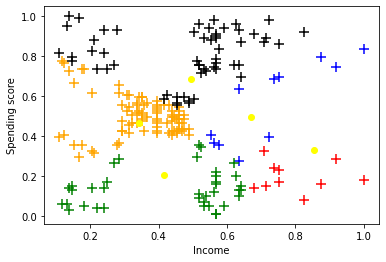

In [9]:
income_score = data[:, [3,4]]
income_score = income_score.astype(float)
income_score[:,0] = income_score[:,0] / np.max(income_score[:,0])
income_score[:,1] = income_score[:,1] / np.max(income_score[:,1])

number = 5
a = scipy.cluster.vq.kmeans(age_income, number)

z = np.array([a[0][:,0] + a[0][:,1]*1j])

clusters = np.argmin(abs(income_score[:,0] + income_score[:,1]*1j - z.T), axis = 0)

colors = ['red', 'orange', 'blue', 'green', 'black', 'grey']

for k in np.arange(number):
    if (k < np.bincount(clusters).size):
        groups = np.empty((np.bincount(clusters)[k],2))
        j=0
        for i in np.arange(clusters.size):
            if clusters[i] == k:
                groups[j,:] = income_score[i,:]
                j = j + 1
        plt.scatter(groups[:,0],groups[:,1], color = colors[k], marker = '+', s = 100, linewidths = 0.1)

plt.scatter(a[0][:,0], a[0][:,1], color = 'yellow')
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.show()